# Trotter bounds

In [8]:
from qiskit.quantum_info import SparsePauliOp

import scipy.sparse.linalg as ssla
from scipy import sparse
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

from utils import *
from lightcone import *
from bounds import *
# from noise import *
# print(f'jax.device: {jax.devices()}; device_count: {jax.device_count()}')
from spin_ham import *

figs_dir = './figs'
data_dir = './data'

## Different norms of Pauli strings

In [9]:
op = SparsePauliOp.from_list([("XIIZI", 1), ("IYIIY", 2)])
print('Spectral norm: ', norm(op, ord=2))
print('Trace norm: ', norm(op, ord='nuc'))
print('Frobenius norm: ', norm(op, ord='fro'))
# print(norm(SparsePauliOp.from_list([("XYZI", 1)]), ord='nuc'))

Spectral norm:  3.0000000000000004
Trace norm:  63.999999999999986
Frobenius norm:  12.649110640673518


### Schatten 4norm

------ n = 4 ------
L: 2
eeee: 288.9900360995922
------ n = 5 ------
L: 2
eeee: 662.7827771689714
------ n = 6 ------
L: 2
eeee: 1200.1307526441897
------ n = 7 ------
L: 2
eeee: 1899.0882933826829
------ n = 8 ------
L: 2
eeee: 2759.4904218744678
------ n = 9 ------
L: 2
eeee: 3781.315318643831
------ n = 10 ------
L: 2
eeee: 4964.5587872752285
------ n = 11 ------
L: 2
eeee: 6309.219762984106
------ n = 12 ------
L: 2
eeee: 7815.297934327988
------ n = 13 ------
L: 2
eeee: 9482.793195304168
------ n = 14 ------
L: 2
eeee: 11311.705502677047
------ n = 15 ------
L: 2
eeee: 13302.03483843864
------ n = 16 ------
L: 2
eeee: 15453.781196109883
------ n = 17 ------
L: 2
eeee: 17766.94457286839
------ n = 18 ------
L: 2
eeee: 20241.52496726477
------ n = 19 ------
L: 2
eeee: 22877.52237850656
------ n = 20 ------
L: 2
eeee: 25674.936806139194
------ n = 21 ------
L: 2
eeee: 28633.76824989149
------ n = 22 ------
L: 2
eeee: 31754.01670959748
------ n = 23 ------
L: 2
eeee: 35035.68218515243

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


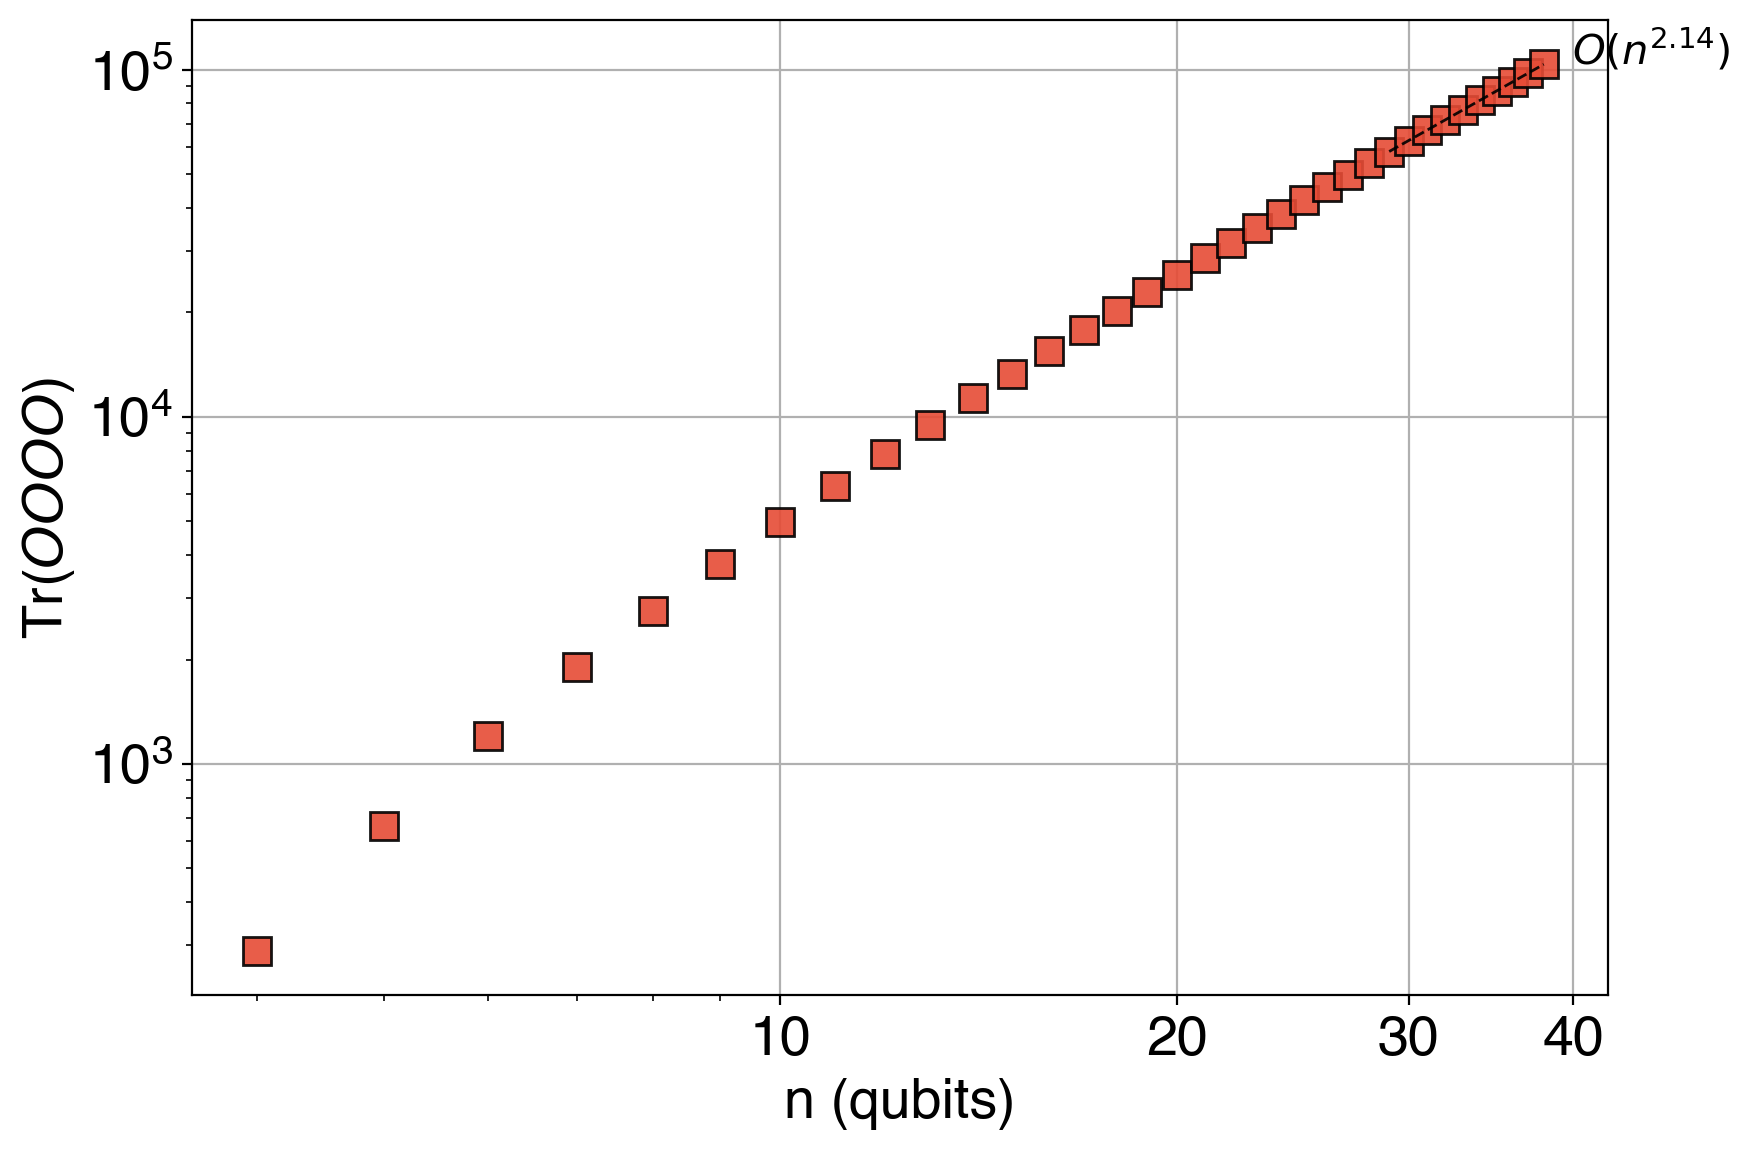

In [27]:
import time, pickle
def nested_commutator_4norm(h_list, p=2):
    L = len(h_list)
    print('L:', L)
    if p == 2:
        sum_norm4 = 0
        for i in range(L):
            cmm = commutator(h_list[i], commutator(h_list[0], h_list[1]).simplify()).simplify()
            sum_norm4 += (np.abs((cmm @ cmm).simplify().coeffs) ** 2).sum()
        return sum_norm4

n_list = np.arange(4, 39)
norm4_list = []
start_time = time.time()
for n in n_list:
    print(f'------ n = {n} ------')
    pow_law = Power_law(n, alpha=4, Jx=1, Jy=0, Jz=0, hx=0.0, hy=0.0, hz=0.2, pbc=False, verbose=False)
    # print('xyz group: ', pow_law.ham_xyz)
    norm4 = nested_commutator_4norm([pow_law.ham_xyz[0], pow_law.ham_xyz[2]], p=2)
    print('eeee:', norm4)
    norm4_list.append(norm4)

with open(f'{data_dir}/norm4_n={n_list[-1]}.pkl', 'wb') as f:
    pickle.dump(norm4_list, f)
end_time = time.time()
print('Time taken:', end_time - start_time)

with open(f'{data_dir}/norm4_n={n_list[-1]}.pkl', 'rb') as f:
    norm4_list = pickle.load(f)

fig, ax = plt.subplots(1, 1, figsize=(9, 6), layout='tight')
ax.plot(n_list, norm4_list, 's', label='Norm4')
plot_fit(ax, n_list[25:], norm4_list[25:], var='n', offset=1.05)
ax.set_xlabel(rf'n (qubits)')
ax.set_ylabel(rf'Tr($OOOO$)')
ax.loglog(); ax.grid()
# ax.set_xticks(n_list)
ax.set_xticks([10, 20, 30, 40])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
plt.savefig(rf'{figs_dir}/nested_commutator_4norm.pdf', dpi=150, bbox_inches='tight')

## Relatex analytical bound

------ n = 2 ------
Relaxed norm: 0.16000000000000003 Exact norm: 0.16000000000000003
------ n = 3 ------
Relaxed norm: 1.9200000000000004 Exact norm: 1.1537764081484767
------ n = 4 ------
Relaxed norm: 2.0800000000000005 Exact norm: 1.2719551089153855
------ n = 5 ------
Relaxed norm: 3.8400000000000003 Exact norm: 2.2289248607873016
------ n = 6 ------
Relaxed norm: 4.0 Exact norm: 2.329728802880907
------ n = 7 ------
Relaxed norm: 5.760000000000001 Exact norm: 3.2856772253140125
------ n = 8 ------
Relaxed norm: 5.920000000000001 Exact norm: 3.376546023561127
------ n = 9 ------
Relaxed norm: 7.680000000000001 Exact norm: 4.335187626193811
------ n = 10 ------
Relaxed norm: 7.840000000000001 Exact norm: 4.41949976409436
------ n = 11 ------
Relaxed norm: 9.600000000000001 Exact norm: 5.381100628423291
------ n = 12 ------
Relaxed norm: 9.760000000000002 Exact norm: 5.460710718128955


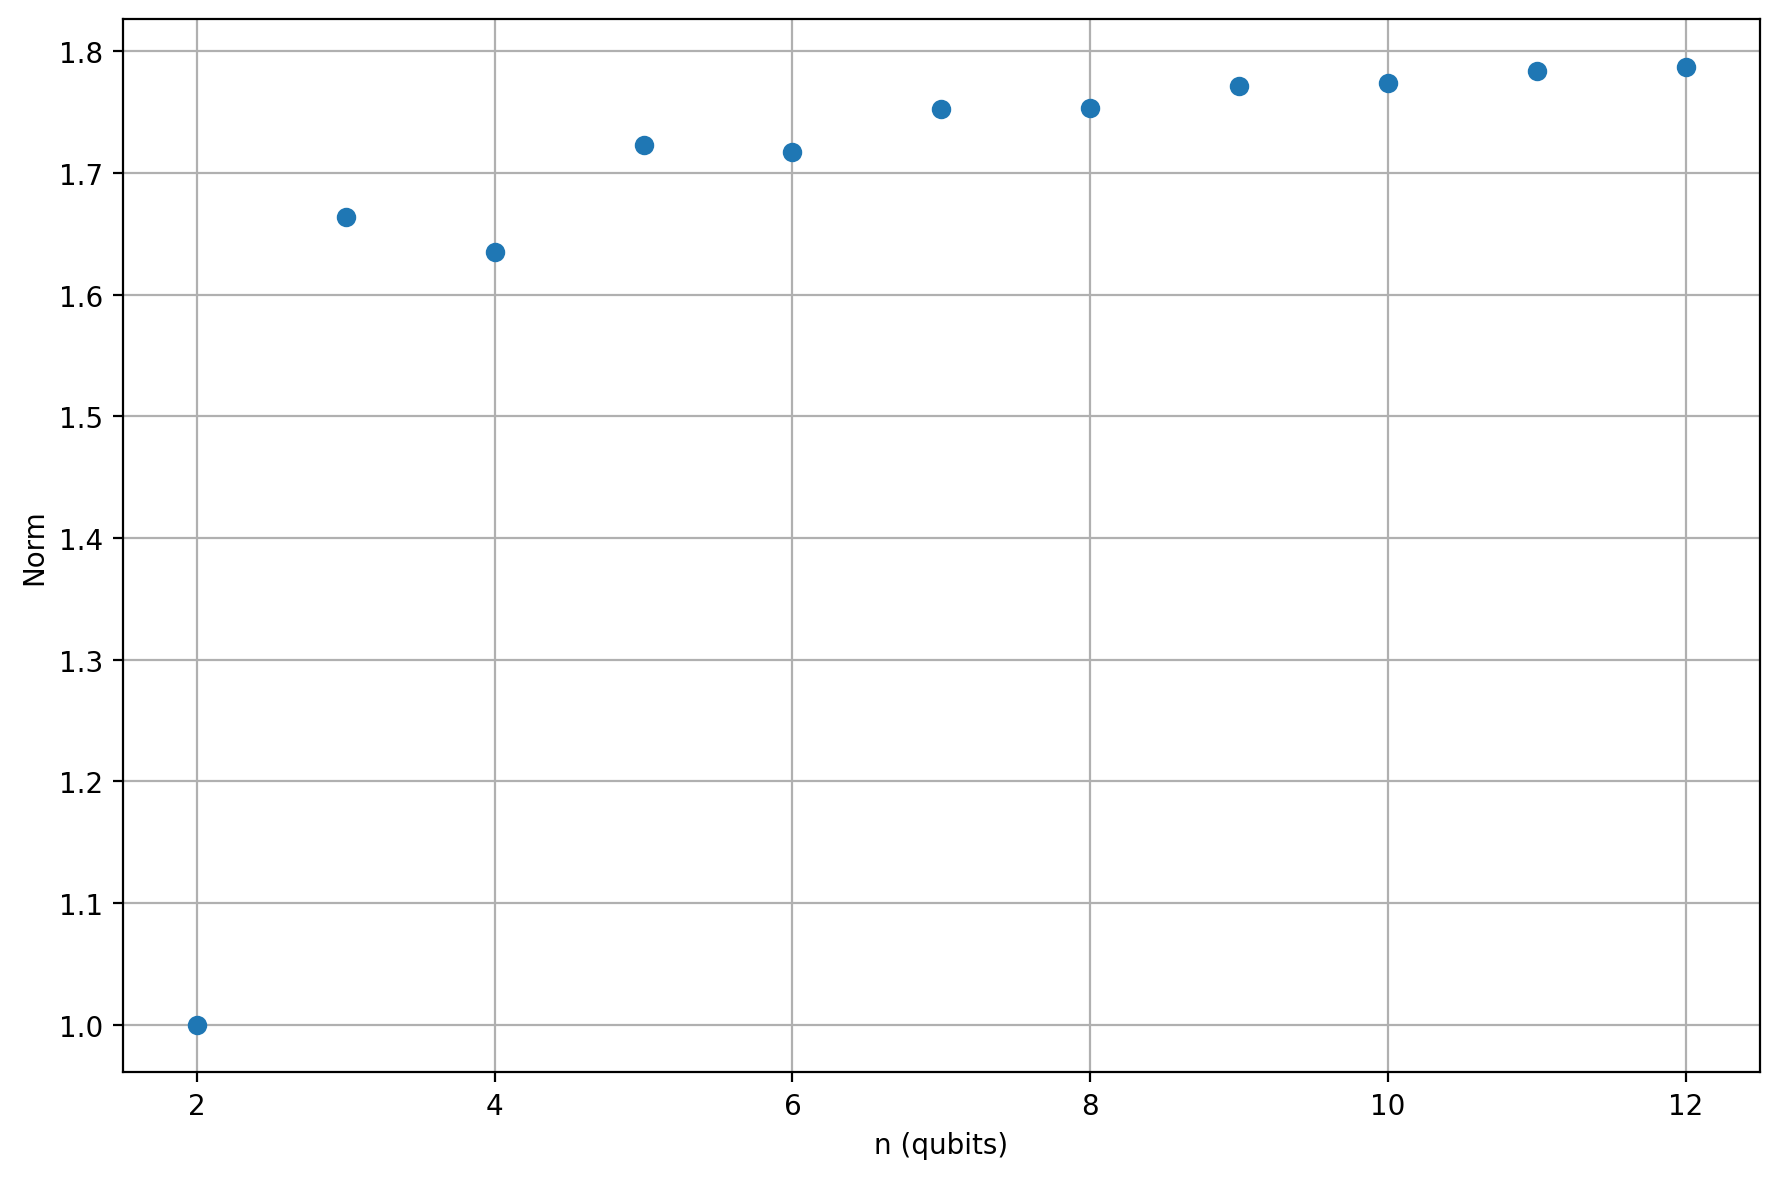

In [4]:
from spin_ham import *
from trotter import *
import numpy 

# J, h = 5, 0.3
J, h = 1, 0.2
n = 500
appro_list = []
exact_list = []
# hnn = Nearest_Neighbour_1d(n, Jx=J, Jy=J, Jz=J, hx=h, hy=0, hz=0, pbc=False, verbose=False)
# cmm = commutator(hnn.ham_par[1], commutator(hnn.ham_par[1], hnn.ham_par[0]).simplify()).simplify()
# cmm.coeffs
n_list = np.arange(2, 13)
for n in n_list:
    print(f'------ n = {n} ------')
    hnn = Nearest_Neighbour_1d(n, Jx=0, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=False, verbose=False)
    cmm = commutator(hnn.ham_par[1], commutator(hnn.ham_par[1], hnn.ham_par[0]).simplify()).simplify()
    relaxed_norm = numpy.linalg.norm(cmm.coeffs, ord=1)
    exact_norm = numpy.linalg.norm(cmm, ord=2)
    exact_list.append(exact_norm)
    appro_list.append(relaxed_norm)
    print('Relaxed norm:', relaxed_norm, 'Exact norm:', exact_norm)

fig, ax = plt.subplots(1, 1, figsize=(9, 6), layout='tight')
# ax.plot(n_list, appro_list, 's', label='Approximated')
# ax.plot(n_list, exact_list, 'o', label='Exact') 
ax.plot(n_list, np.divide(appro_list, exact_list), 'o', label='Exact') 
ax.set_xlabel(rf'n (qubits)')
ax.set_ylabel(rf'Norm') 
# ax.loglog(); 
ax.grid()  

In [7]:
hnn = Nearest_Neighbour_1d(4, Jx=0, Jy=0, Jz=J, hx=h, hy=0, hz=0, pbc=False, verbose=False)
commutator(hnn.ham_par[1], commutator(hnn.ham_par[1], hnn.ham_par[0])).simplify()

SparsePauliOp(['IIZZ', 'ZZII', 'IXII', 'IZXZ', 'IYYI'],
              coeffs=[ 0.16+0.j,  0.16+0.j,  0.8 +0.j, -0.8 +0.j,  0.16+0.j])

n = 4
n = 5
n = 6
n = 7
n = 8
n = 9
n = 10
n = 11
n = 12
n = 13
n = 14


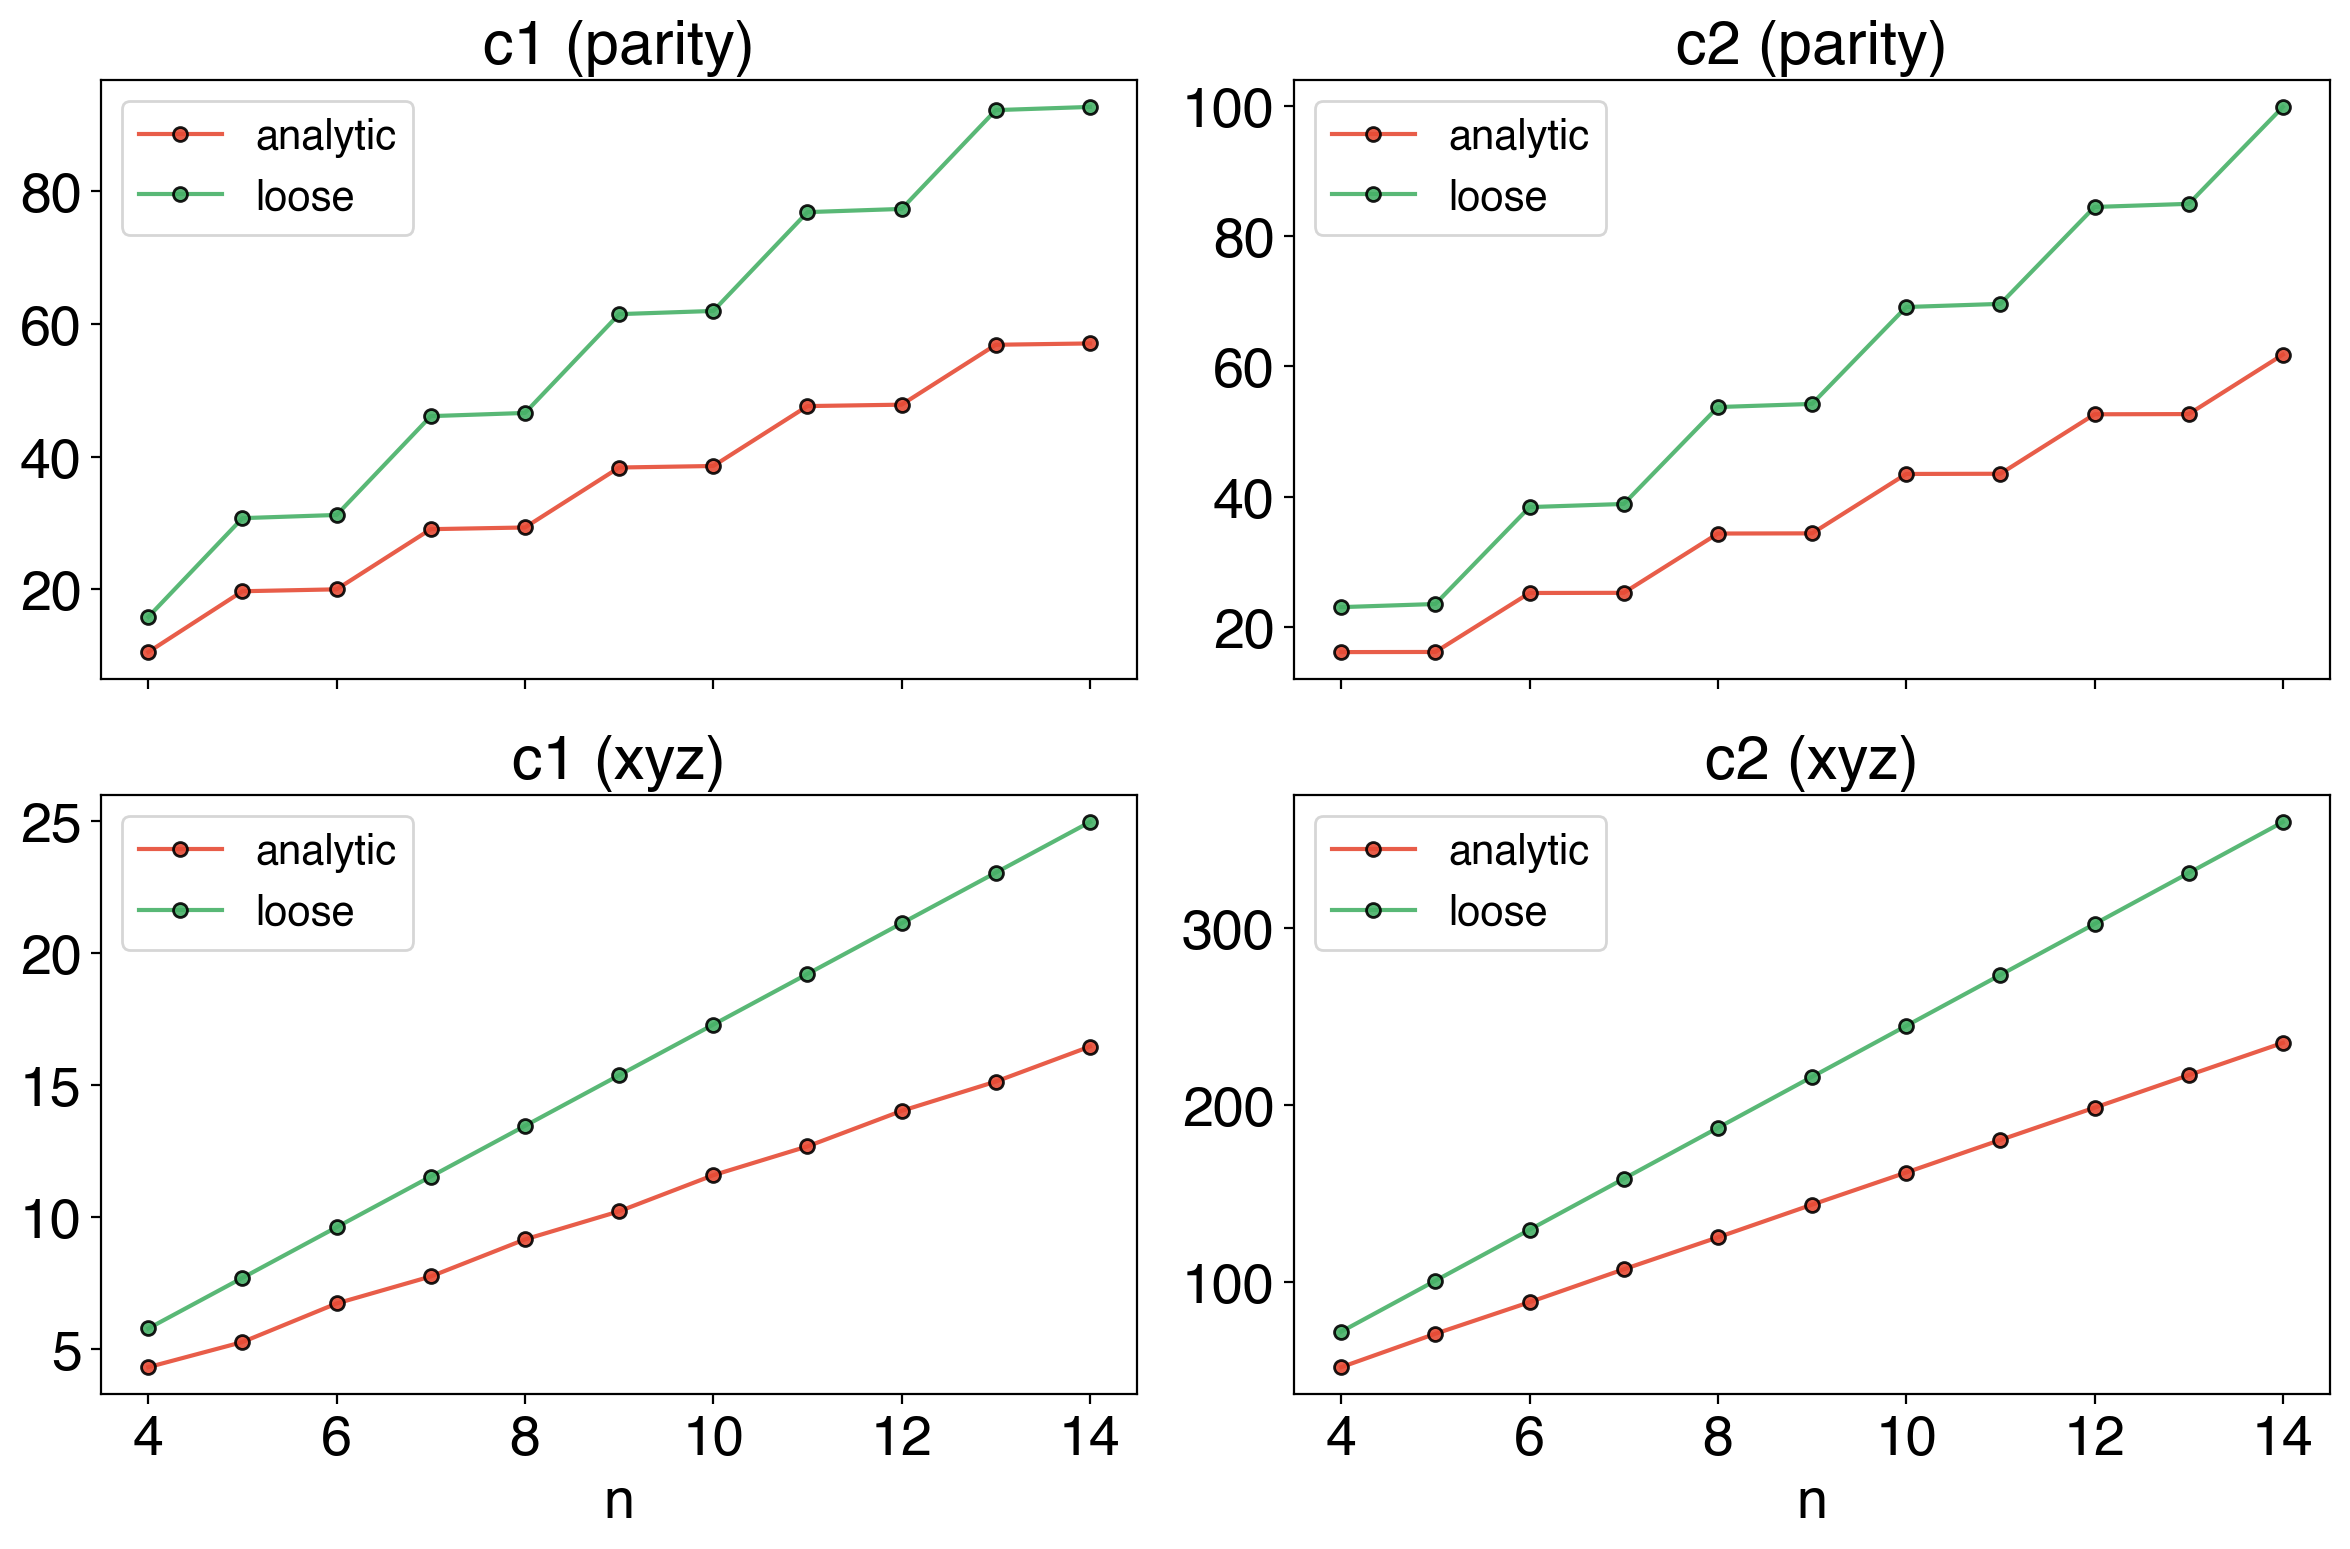

In [7]:
from spin_ham import TF_Ising_1d
n_list = [4, 5, 6, 7, 8, 9, 10, 11, 12]
# n_list = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
J, h = 3, 0.2
par_c1_dict = dict({'analytic': [], 'loose': []})
par_c2_dict = dict({'analytic': [], 'loose': []})
xyz_c1_dict = dict({'analytic': [], 'loose': []})
xyz_c2_dict = dict({'analytic': [], 'loose': []})
for n in n_list:
    print(f'n = {n}')
    tfI = TF_Ising_1d(n, J, h)
    # print('Hamiltonian: ', tfI.ham)
    # print(commutator(tfI.ham_parity[0], tfI.ham_parity[1]).simplify())
    c1_par_commutator = commutator(tfI.ham_parity[1], commutator(tfI.ham_parity[1], tfI.ham_parity[0])).simplify()
    # print("c1_xyz_commutator: ", c1_par_commutator, "\n norm: ", norm(c1_par_commutator, ord=2))
    c2_par_commutator = commutator(tfI.ham_parity[0], commutator(tfI.ham_parity[0], tfI.ham_parity[1])).simplify()
    par_c1_dict['analytic'].append(norm(c1_par_commutator, ord=2))
    par_c1_dict['loose'].append(analytic_loose_commutator_bound_parity(n, J, h, 1)[1])
    par_c2_dict['analytic'].append(norm(c2_par_commutator, ord=2))
    par_c2_dict['loose'].append(analytic_loose_commutator_bound_parity(n, J, h, 1)[2])
    # print("c2_xyz_commutator: ", c2_par_commutator, "\n norm: ", norm(c2_par_commutator, ord=2))

    # print(commutator(tfI.ham_xyz[0], tfI.ham_xyz[1]).simplify())
    c1_xyz_commutator = commutator(tfI.ham_xyz[1], commutator(tfI.ham_xyz[1], tfI.ham_xyz[0])).simplify()
    # print("c1_xyz_commutator: ", c1_xyz_commutator, "\n norm: ", norm(c1_xyz_commutator, ord=2))
    c2_xyz_commutator = commutator(tfI.ham_xyz[0], commutator(tfI.ham_xyz[0], tfI.ham_xyz[1])).simplify()
    # print("c2_xyz_commutator: ", c2_xyz_commutator, "\n norm: ", norm(c2_xyz_commutator, ord=2))
    xyz_c1_dict['analytic'].append(norm(c1_xyz_commutator, ord=2))
    xyz_c1_dict['loose'].append(analytic_loose_commutator_bound_xyz(n, J, h, 1)[1])
    xyz_c2_dict['analytic'].append(norm(c2_xyz_commutator, ord=2))
    xyz_c2_dict['loose'].append(analytic_loose_commutator_bound_xyz(n, J, h, 1)[2])

# print(c1_dict)
# print(c2_dict)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, layout='tight')
axes[0][0].plot(n_list, par_c1_dict['analytic'], '.-', label='analytic')
axes[0][0].plot(n_list, par_c1_dict['loose'], '.-', label='loose')
axes[0][1].plot(n_list, par_c2_dict['analytic'], '.-', label='analytic')
axes[0][1].plot(n_list, par_c2_dict['loose'], '.-', label='loose')
axes[1][0].plot(n_list, xyz_c1_dict['analytic'], '.-', label='analytic')
axes[1][0].plot(n_list, xyz_c1_dict['loose'], '.-', label='loose')
axes[1][1].plot(n_list, xyz_c2_dict['analytic'], '.-', label='analytic')
axes[1][1].plot(n_list, xyz_c2_dict['loose'], '.-', label='loose')
axes[0][0].set_title('c1 (parity)')
axes[0][1].set_title('c2 (parity)')
axes[1][0].set_title('c1 (xyz)')
axes[1][1].set_title('c2 (xyz)')
for ax in axes.flatten():
    ax.legend()
    # ax.loglog()
axes[1][0].set_xlabel('n')
axes[1][1].set_xlabel('n')
fig.savefig(f'{figs_dir}/loose_bound_compare_n={n_list[-1]}.pdf')

### Different groupings

In [14]:
SparsePauliOp.from_sparse_list([('X', [i], -h) for i in range(0, 2)] , num_qubits=4)

SparsePauliOp(['IIIX', 'IIXI'],
              coeffs=[-0.2+0.j, -0.2+0.j])

In [15]:
tfI4 = TF_Ising_1d(4, J, h)
tfI8 = TF_Ising_1d(8, J, h)
print('tfI8.ham: ', tfI8.ham.simplify())
# tfI4.ham_parity[0]
tfI8.ham_parity[0]
tfI8.ham_parity[1]
tfi8_0 = SparsePauliOp(['IIIIIIZZ', 'IIIIZZII', 'IIIIIIIX', 'IIIIIXII'], coeffs=[-1. +0.j, -1. +0.j, -0.2+0.j, -0.2+0.j])
tfi8_1 = SparsePauliOp(['IIIIIZZI', 'IIIIIIXI', 'IIIIXIII'], coeffs=[-1. +0.j, -0.2+0.j, -0.2+0.j])
tfi8_tail = SparsePauliOp(['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'], coeffs=[-1. +0.j,-1. +0.j, -1. +0.j, -1. +0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j])
# SparsePauliOp.from_sparse_list([*tfI4.zz_tuples, *tfI4.x_tuples, *tfI4.z_tuples], num_qubits=8)
# commutator(tfI4.ham_parity[0], tfI4.ham_parity[1]).simplify()
H_tfi8 = [tfi8_0, tfi8_1, tfi8_tail]

nested1 = commutator(sum(tfi8_1, tfi8_tail), commutator(sum(tfi8_1, tfi8_tail), tfi8_0))
nested2 = commutator(tfi8_tail, commutator(tfi8_1, tfi8_tail))
# print(nested1.simplify())
# print(nested2.simplify())
nested1.simplify() + nested2.simplify()

tfI8.ham:  SparsePauliOp(['IIIIIIZZ', 'IIIIIZZI', 'IIIIZZII', 'IIIZZIII', 'IIZZIIII', 'IZZIIIII', 'ZZIIIIII', 'IIIIIIIX', 'IIIIIIXI', 'IIIIIXII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'],
              coeffs=[-3. +0.j, -3. +0.j, -3. +0.j, -3. +0.j, -3. +0.j, -3. +0.j, -3. +0.j,
 -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j,
 -0.2+0.j])


SparsePauliOp(['IIIIIIZZ', 'IIIIZZII', 'IIIIIXII', 'IIIZXZII', 'IIIIIZXZ', 'IIIIIYYI', 'IIIIXIII', 'IIIYYIII'],
              coeffs=[-0.16+0.j, -0.16+0.j, -0.8 +0.j,  0.8 +0.j,  0.8 +0.j, -0.16+0.j,
  0.8 +0.j,  0.16+0.j])

In [17]:
nested1 = commutator(tfi8_0, commutator(tfi8_0, sum(tfi8_1, tfi8_tail)))
nested2 = commutator(tfi8_1, commutator(tfi8_1, tfi8_tail))
# print(nested1.simplify())
print(nested2.simplify())
# nested1.simplify() + nested2.simplify()

SparsePauliOp(['IIIZZIII'],
              coeffs=[-0.16+0.j])


In [18]:
from spin_ham import TF_Ising_1d
J=1; h=0.2; 
n = 2; t = 1
r = 5

tfI = TF_Ising_1d(n, J, h)
# print("Parity grouping: ", tfI.ham_parity)
# print("XYZ grouping: ", tfI.ham_xyz)
xyz_commutator = commutator(tfI.ham_xyz[0], tfI.ham_xyz[1]).simplify()
# tfI.ham_parity
# print("xyz_commutator: \n", xyz_commutator, "\n norm: ", norm(xyz_commutator, ord=2))
c1_xyz_commutator = commutator(tfI.ham_xyz[1], commutator(tfI.ham_xyz[1], tfI.ham_xyz[0])).simplify()
print("c1_xyz_commutator: \n", c1_xyz_commutator, "\n c1 norm: ", norm(c1_xyz_commutator, ord=2))
c2_xyz_commutator = commutator(tfI.ham_xyz[0], commutator(tfI.ham_xyz[0], tfI.ham_xyz[1])).simplify()
print("c2_xyz_commutator: \n", c2_xyz_commutator, "\n c2 norm: ", norm(c2_xyz_commutator, ord=2))
print(analytic_loose_commutator_bound_xyz(n, J, h, t/r))
# print(8*J*h**2, 4*J**2*h)

par_commutator = commutator(tfI.ham_parity[0], tfI.ham_parity[1]).simplify()
# print("par_commutator: ", par_commutator, "\n norm: ", norm(par_commutator, ord=2))
c1_par_commutator = commutator(tfI.ham_parity[1], commutator(tfI.ham_parity[1], tfI.ham_parity[0])).simplify()
print("c1_par_commutator: ", c1_par_commutator, "\n norm: ", norm(c1_par_commutator, ord=2))
c2_par_commutator = commutator(tfI.ham_parity[0], commutator(tfI.ham_parity[0], tfI.ham_parity[1])).simplify()
print("c2_par_commutator: ", c2_par_commutator, "\n norm: ", norm(c2_par_commutator, ord=2))
print(analytic_loose_commutator_bound_parity(n, J, h, t/r))
# print(4*J*h**2, 4*J**2*h)
# print(norm(xyz_commutator, ord=2))
# print(norm(par_commutator, ord=2))

c1_xyz_commutator: 
 SparsePauliOp(['ZZ', 'YY'],
              coeffs=[-0.32+0.j,  0.32+0.j]) 
 c1 norm:  0.6400000000000002
c2_xyz_commutator: 
 SparsePauliOp(['IX', 'XI'],
              coeffs=[-0.8+0.j, -0.8+0.j]) 
 c2 norm:  1.6
(0.0009600000000000003, 0.6400000000000001, 1.6)
c1_par_commutator:  SparsePauliOp(['ZZ'],
              coeffs=[-0.16+0.j]) 
 norm:  0.16000000000000003
c2_par_commutator:  SparsePauliOp(['XI', 'YY'],
              coeffs=[-0.8 +0.j, -0.16+0.j]) 
 norm:  0.8158431221748457
(0.00042666666666666683, 0.16000000000000003, 0.9600000000000001)


In [19]:
from spin_ham import TF_Ising_1d
J=1; h=0.2; 
n = 3; t = 1
r = 5

tfI = TF_Ising_1d(n, J, h)
# print("Parity grouping: ", tfI.ham_parity)
# print("XYZ grouping: ", tfI.ham_xyz)
xyz_commutator = commutator(tfI.ham_xyz[0], tfI.ham_xyz[1]).simplify()
# tfI.ham_parity
# print("xyz_commutator: \n", xyz_commutator, "\n norm: ", norm(xyz_commutator, ord=2))
c1_xyz_commutator = commutator(tfI.ham_xyz[1], commutator(tfI.ham_xyz[1], tfI.ham_xyz[0])).simplify()
print("c1_xyz_commutator: \n", c1_xyz_commutator, "\n c1 norm: ", norm(c1_xyz_commutator, ord=2))
c2_xyz_commutator = commutator(tfI.ham_xyz[0], commutator(tfI.ham_xyz[0], tfI.ham_xyz[1])).simplify()
print("c2_xyz_commutator: \n", c2_xyz_commutator, "\n c2 norm: ", norm(c2_xyz_commutator, ord=2))
print(analytic_loose_commutator_bound_xyz(n, J, h, t/r))
# print(8*J*h**2, 4*J**2*h)

par_commutator = commutator(tfI.ham_parity[1], tfI.ham_parity[0]).simplify()
# print("par_commutator: ", par_commutator, "\n norm: ", norm(par_commutator, ord=2))
c1_par_commutator = commutator(tfI.ham_parity[0], commutator(tfI.ham_parity[0], tfI.ham_parity[1])).simplify()
print("c1_par_commutator: ", c1_par_commutator, "\n norm: ", norm(c1_par_commutator, ord=2))
c2_par_commutator = commutator(tfI.ham_parity[1], commutator(tfI.ham_parity[1], tfI.ham_parity[0])).simplify()
print("c2_par_commutator: ", c2_par_commutator, "\n norm: ", norm(c2_par_commutator, ord=2))
print(analytic_loose_commutator_bound_parity(n, J, h, t/r))
# print(4*J*h**2, 4*J**2*h)
# print(norm(xyz_commutator, ord=2))
# print(norm(par_commutator, ord=2))

c1_xyz_commutator: 
 SparsePauliOp(['IZZ', 'ZZI', 'IYY', 'YYI'],
              coeffs=[-0.32+0.j, -0.32+0.j,  0.32+0.j,  0.32+0.j]) 
 c1 norm:  0.9050966799187812
c2_xyz_commutator: 
 SparsePauliOp(['IIX', 'IXI', 'XII', 'ZXZ'],
              coeffs=[-0.8+0.j, -1.6+0.j, -0.8+0.j, -1.6+0.j]) 
 c2 norm:  3.862741699796953
(0.0024533333333333343, 1.2800000000000002, 4.800000000000001)
c1_par_commutator:  SparsePauliOp(['ZZI', 'IXI', 'IYY'],
              coeffs=[-0.16+0.j, -0.8 +0.j, -0.16+0.j]) 
 norm:  0.8313843876330612
c2_par_commutator:  SparsePauliOp(['IZZ', 'XII', 'ZXZ', 'YYI'],
              coeffs=[-0.16+0.j, -0.8 +0.j,  0.8 +0.j, -0.16+0.j]) 
 norm:  1.153776408148477
(0.001653333333333334, 1.9200000000000002, 1.12)


In [20]:
tfi8_0 = SparsePauliOp(['IIIIIIZZ', 'IIIIIIIX'], coeffs=[-1. +0.j, -0.2+0.j])
tfi8_1 = SparsePauliOp([ 'IIIIIIXI'], coeffs=[-0.2+0.j])
tfi8_tail = SparsePauliOp(['IIIIIZZI','ZZIIIIII', 'IIIIZZII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII', 'IIIIIXII'], coeffs=[-1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j,-1. +0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j])
# SparsePauliOp.from_sparse_list([*tfI4.zz_tuples, *tfI4.x_tuples, *tfI4.z_tuples], num_qubits=8)
# commutator(tfI4.ham_parity[0], tfI4.ham_parity[1]).simplify()
H_tfi8 = [tfi8_0, tfi8_1, tfi8_tail]

c1_nested1 = commutator(sum(tfi8_1, tfi8_tail), commutator(sum(tfi8_1, tfi8_tail), tfi8_0))
c1_nested2 = commutator(tfi8_tail, commutator(tfi8_1, tfi8_tail))
print(c1_nested1.simplify())
print(c1_nested2.simplify())
print('c1: ', (c1_nested1 + c1_nested2).simplify())
# commutator(tfi8_0, tfi8_tail).simplify()

c2_nested1 = commutator(tfi8_0, commutator(tfi8_0, sum(tfi8_1, tfi8_tail)))
c2_nested2 = commutator(tfi8_1, commutator(tfi8_1, tfi8_tail))
print(c2_nested1.simplify())
print(c2_nested2.simplify())
print('c2: ', (c2_nested1 + c2_nested2).simplify())

SparsePauliOp(['IIIIIIZZ', 'IIIIIZXZ'],
              coeffs=[-0.16+0.j,  0.8 +0.j])
SparsePauliOp(['IIIIIIXI', 'IIIIIYYI'],
              coeffs=[0.8 +0.j, 0.16+0.j])
c1:  SparsePauliOp(['IIIIIIZZ', 'IIIIIZXZ', 'IIIIIIXI', 'IIIIIYYI'],
              coeffs=[-0.16+0.j,  0.8 +0.j,  0.8 +0.j,  0.16+0.j])
SparsePauliOp(['IIIIIIXI', 'IIIIIIYY'],
              coeffs=[-0.8 +0.j, -0.16+0.j])
SparsePauliOp(['IIIIIZZI'],
              coeffs=[-0.16+0.j])
c2:  SparsePauliOp(['IIIIIZZI', 'IIIIIIXI', 'IIIIIIYY'],
              coeffs=[-0.16+0.j, -0.8 +0.j, -0.16+0.j])


### r=3

In [23]:
tfi8_1 = SparsePauliOp(['IIIIIIZZ', 'IIIIIIIX', 'IIIIIXII'], coeffs=[-1. +0.j, -0.2+0.j, -0.2+0.j])
tfi8_0 = SparsePauliOp(['IIIIIZZI', 'IIIIIIXI'], coeffs=[-1. +0.j, -0.2+0.j])
tfi8_tail = SparsePauliOp(['ZZIIIIII', 'IIIIZZII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'], coeffs=[-1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j,-1. +0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j, -0.2+0.j])
# SparsePauliOp.from_sparse_list([*tfI4.zz_tuples, *tfI4.x_tuples, *tfI4.z_tuples], num_qubits=8)
# commutator(tfI4.ham_parity[0], tfI4.ham_parity[1]).simplify()
H_tfi8 = [tfi8_0, tfi8_1, tfi8_tail]

nested1 = commutator(sum(tfi8_1, tfi8_tail), commutator(sum(tfi8_1, tfi8_tail), tfi8_0))
nested2 = commutator(tfi8_tail, commutator(tfi8_1, tfi8_tail))
print(nested1.simplify())
print(nested2.simplify())
nested1.simplify() + nested2.simplify()
# commutator(tfi8_0, tfi8_tail).simplify()

SparsePauliOp(['IIIIIZZI', 'IIIIIIXI', 'IIIIZXZI', 'IIIIIIYY'],
              coeffs=[-0.16+0.j, -0.8 +0.j,  0.8 +0.j, -0.16+0.j])
SparsePauliOp(['IIIIIXII', 'IIIIYYII'],
              coeffs=[0.8 +0.j, 0.16+0.j])


SparsePauliOp(['IIIIIZZI', 'IIIIIIXI', 'IIIIZXZI', 'IIIIIIYY', 'IIIIIXII', 'IIIIYYII'],
              coeffs=[-0.16+0.j, -0.8 +0.j,  0.8 +0.j, -0.16+0.j,  0.8 +0.j,  0.16+0.j])

In [25]:
print(tfi8_1)
print(tfi8_tail)
# commutator(tfi8_1, tfi8_tail).simplify()

SparsePauliOp(['IIIIIIZZ', 'IIIIIIIX', 'IIIIIXII'],
              coeffs=[-1. +0.j, -0.2+0.j, -0.2+0.j])
SparsePauliOp(['ZZIIIIII', 'IIIIZZII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIXIII', 'IIIXIIII', 'IIXIIIII', 'IXIIIIII', 'XIIIIIII'],
              coeffs=[-1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -0.2+0.j, -0.2+0.j,
 -0.2+0.j, -0.2+0.j, -0.2+0.j])


In [26]:
nested1 = commutator(tfi8_0, commutator(tfi8_0, sum(tfi8_1, tfi8_tail)))
nested2 = commutator(tfi8_1, commutator(tfi8_1, tfi8_tail))
print(nested1.simplify())
print(nested2.simplify())
(nested1 + nested2).simplify()

SparsePauliOp(['IIIIIIZZ', 'IIIIIXII', 'IIIIIZXZ', 'IIIIIYYI'],
              coeffs=[-0.16+0.j, -0.8 +0.j,  0.8 +0.j, -0.16+0.j])
SparsePauliOp(['IIIIZZII'],
              coeffs=[-0.16+0.j])


SparsePauliOp(['IIIIZZII', 'IIIIIIZZ', 'IIIIIXII', 'IIIIIZXZ', 'IIIIIYYI'],
              coeffs=[-0.16+0.j, -0.16+0.j, -0.8 +0.j,  0.8 +0.j, -0.16+0.j])